In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RECURSOS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios
5. PCA

In [2]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [3]:
#Se cargan los archivos limpios sin variables repetidas, imputados los datos y sin atípicos

total=pd.read_excel("TOTALULIMPIO2-2016.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
10471,140767,5,1410,2016,1.665038,14.000000,5.370346,12.562613,2.2875,14.0,...,14400.0,223374,223374,800.000000,79.846659,209107,3.252153e+06,5.155038e+06,4.996960e+06,223374
10474,140807,5,1410,2016,1.665038,16.000000,5.370346,12.562613,2.2875,15.0,...,46396.0,289190,289190,343423.189677,79.846659,246552,2.147500e+04,5.155038e+06,4.996960e+06,289190
10475,140808,5,1410,2016,1.665038,28.000000,1.000000,1.000000,2.2875,27.0,...,46429.0,656973,656973,39787.000000,79.846659,626118,1.553240e+05,5.155038e+06,4.996960e+06,657023
10476,140809,5,1410,2016,1.665038,1.000000,5.370346,12.562613,2.2875,18.0,...,24497.0,516359,516359,24497.000000,36.000000,439511,6.641000e+04,5.155038e+06,4.996960e+06,516359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,6.182680e+05,5.155038e+06,4.996960e+06,1100444
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2.164604e+06,5.155038e+06,4.996960e+06,3300208
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6.940062e+06,5.155038e+06,1.608454e+06,15443532
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,4.216890e+05,5.155038e+06,1.717450e+05,1180126


2.Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas

In [4]:
variables = ['INV_MP','INV_PP','INV_PT','INV_PTNOFAB','TOTALINV','MPCOMPRADA','PROD_BRUTA','PROD_INDUST','INVER_TERRENO',
            'INVER_EDIF','INVER_MAQ','INVER_OFICINA','INVER_EQTRANSP','TOTALINVER','VAL_TERRENO','VAL_EDIF','VAL_MAQ',
            'VAL_OFICINA','VAL_EQTRANSP','VALORACTIVOS','INVERBRUTA','GASTOSCARTERA','SEGUROS','VENTAS']

# Separando los Recursos (Varibles independientes)
X=total.loc[:,variables].values 

# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 

x_std= StandardScaler().fit_transform(X)

In [5]:
recursos = pd.DataFrame(data = X, columns = variables).head(823)
recursos

,INV_MP,INV_PP,INV_PT,INV_PTNOFAB,TOTALINV,MPCOMPRADA,PROD_BRUTA,PROD_INDUST,INVER_TERRENO,INVER_EDIF,...,VAL_TERRENO,VAL_EDIF,VAL_MAQ,VAL_OFICINA,VAL_EQTRANSP,VALORACTIVOS,INVERBRUTA,GASTOSCARTERA,SEGUROS,VENTAS
0,8.872281e+05,751881.4899,1.245539e+06,852834.702155,2.503561e+06,3.252153e+06,223374.0,223374.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,12800.0,1600.000000,132514.502622,14400.0,800.000000,8.969314e+06,43511.436095,223374.0
1,8.872281e+05,751881.4899,1.245539e+06,852834.702155,2.503561e+06,2.147500e+04,289190.0,289190.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,46396.0,165015.144085,132514.502622,46396.0,343423.189677,8.969314e+06,43511.436095,289190.0
2,8.872281e+05,751881.4899,1.245539e+06,852834.702155,2.503561e+06,1.553240e+05,656973.0,656973.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,45130.0,165015.144085,132514.502622,46429.0,39787.000000,8.969314e+06,43511.436095,657023.0
3,3.852600e+04,751881.4899,1.245539e+06,852834.702155,3.852600e+04,6.641000e+04,516359.0,516359.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,22741.0,165015.144085,132514.502622,24497.0,24497.000000,8.969314e+06,995.000000,516359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.477983e+06,751881.4899,1.435000e+04,852834.702155,1.492333e+06,6.182680e+05,1290356.0,1290356.0,560033.398417,686757.843923,...,1.861905e+06,2.269648e+06,163917.0,6425.000000,132514.502622,188741.0,11182.000000,8.969314e+06,10847.000000,1100444.0
820,8.872281e+05,751881.4899,5.510530e+05,852834.702155,5.510530e+05,2.164604e+06,3679414.0,3679414.0,560033.398417,686757.843923,...,1.861905e+06,2.000000e+05,93843.0,14789.000000,151500.000000,465071.0,343423.189677,8.969314e+06,4900.000000,3300208.0
821,7.329380e+05,79984.0000,9.949920e+05,15865.000000,1.823779e+06,6.940062e+06,15549225.0,15550083.0,560033.398417,246000.000000,...,1.861905e+06,2.460000e+05,2049837.0,207837.000000,159674.000000,2874293.0,503083.000000,2.444700e+04,34127.000000,15443532.0
822,8.911900e+04,751881.4899,1.245539e+06,852834.702155,8.911900e+04,4.216890e+05,1284882.0,1284882.0,560033.398417,686757.843923,...,1.861905e+06,3.052600e+04,61378.0,80619.000000,84752.000000,300842.0,343423.189677,8.969314e+06,3149.000000,1180126.0


In [6]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursos.isnull().sum() # Saber si hay casos con NA
recursos.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursos.columns

Index(['INV_MP', 'INV_PP', 'INV_PT', 'INV_PTNOFAB', 'TOTALINV', 'MPCOMPRADA',
       'PROD_BRUTA', 'PROD_INDUST', 'INVER_TERRENO', 'INVER_EDIF', 'INVER_MAQ',
       'INVER_OFICINA', 'INVER_EQTRANSP', 'TOTALINVER', 'VAL_TERRENO',
       'VAL_EDIF', 'VAL_MAQ', 'VAL_OFICINA', 'VAL_EQTRANSP', 'VALORACTIVOS',
       'INVERBRUTA', 'GASTOSCARTERA', 'SEGUROS', 'VENTAS'],
      dtype='object')

In [7]:
#Se elimina la variable ventas pues X=VARIABLES INDEPENDIENTES=Recursos Tangibles
x=recursos.drop("VENTAS",axis = 1)

y=recursos["VENTAS"]  #Y=VARIABLE DEPENDIENTE= Ventas
names=recursos.columns

X_std= StandardScaler().fit_transform(x) #Normalizando

<Figure size 432x288 with 0 Axes>

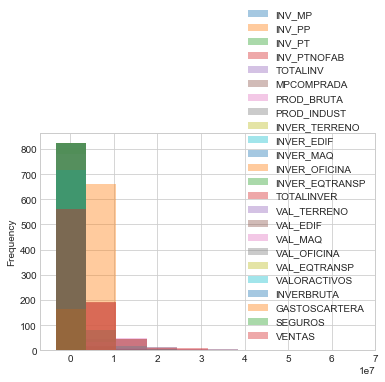

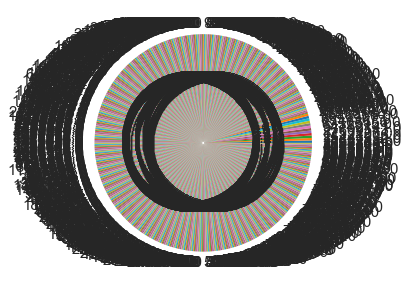

In [8]:
plt.figure("Histograma")
recursos.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursos.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto.

In [9]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

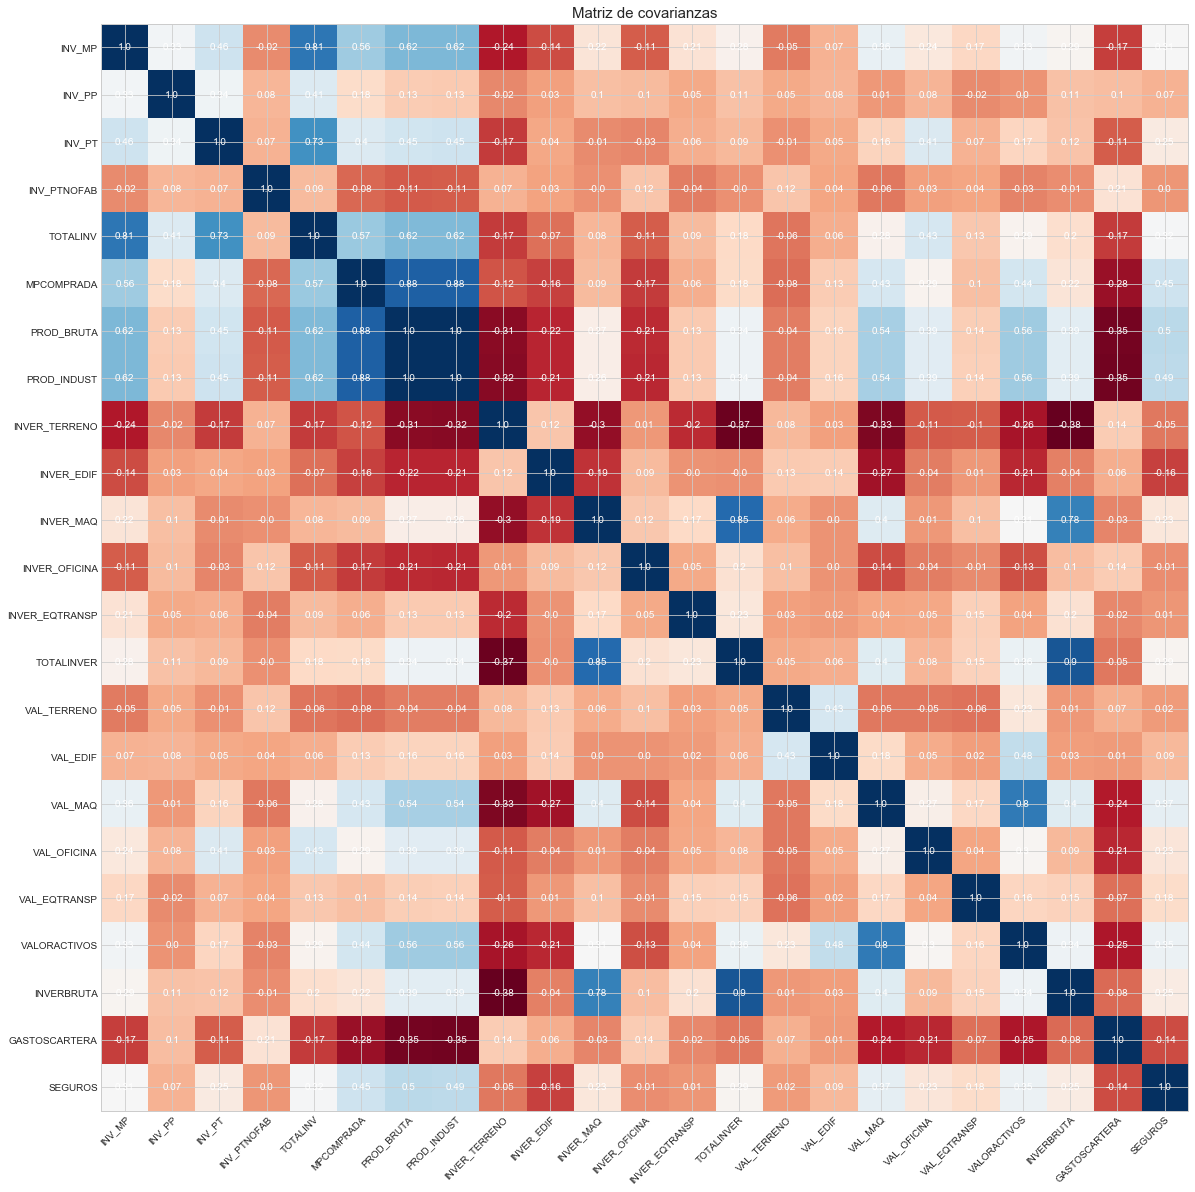

In [10]:
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(20,20))#Figsize para aumentar el tamaño
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:33])
ax.set_yticklabels(names[:33])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

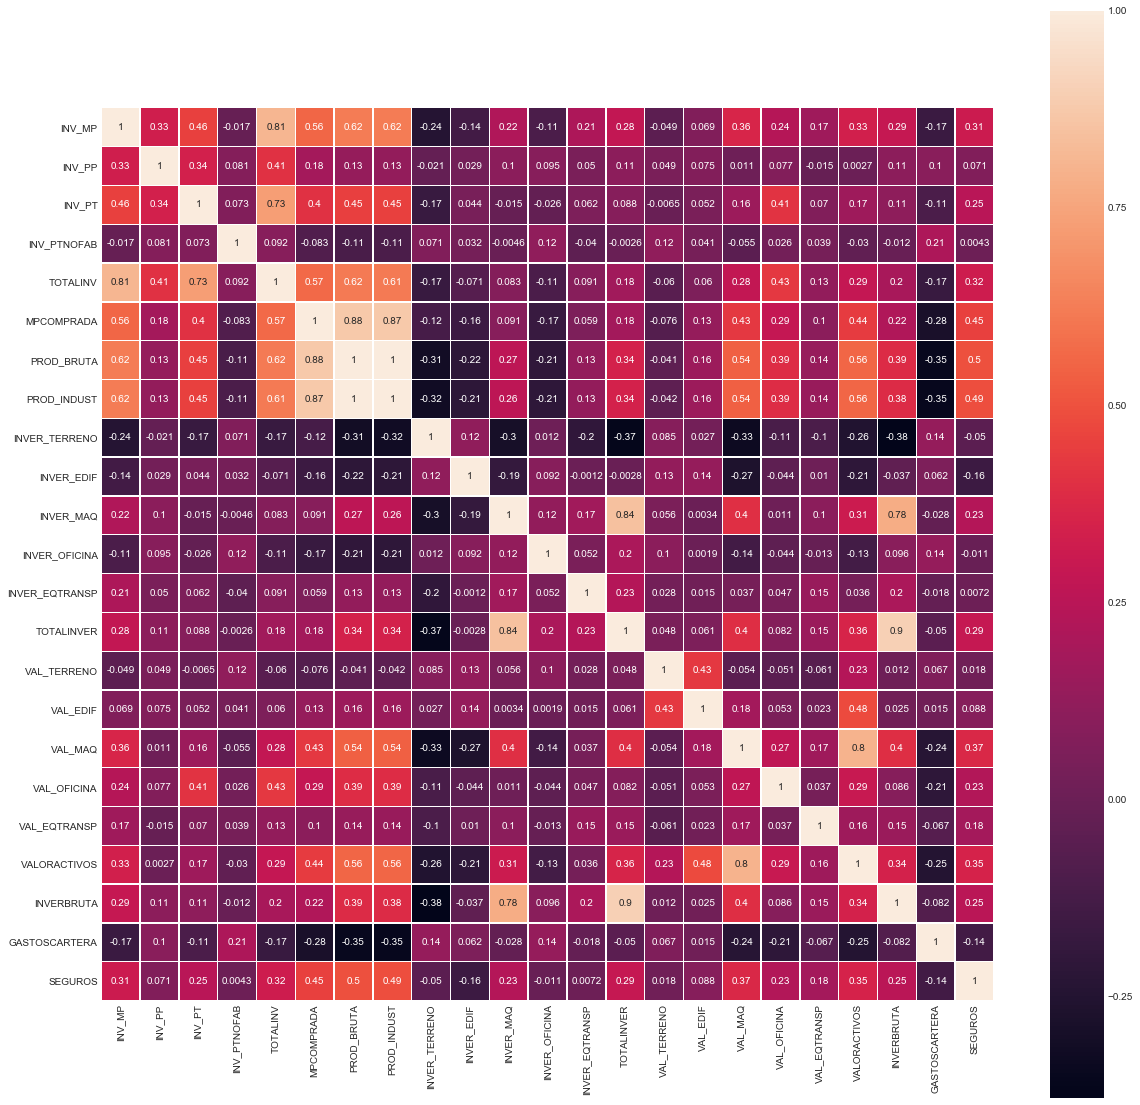

In [11]:
#Matriz de covarianzas
plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [12]:
eigen_value, eigen_vector =np.linalg.eig(x.corr()) 
print("Valores propios: \n %s \n" %eigen_value)

#Teniendo en cuenta que no estan ordenados a continuación se ordenan los valores propios 

Valores propios: 
 [6.41473475e+00 2.60757711e+00 1.85453638e+00 1.72801028e+00
 1.16314769e+00 2.85950083e-04 6.84590256e-02 9.34513205e-02
 1.07942505e-01 1.20560485e-01 1.91107713e-01 1.05629937e+00
 1.00989356e+00 9.83431793e-01 8.69134192e-01 4.03487581e-01
 4.35062017e-01 5.09149052e-01 5.44373089e-01 7.94151407e-01
 6.25852151e-01 7.15550096e-01 7.03802479e-01] 



In [13]:

eigen_value, eigen_vector =np.linalg.eig(x.corr()) 


# Hacer una lista (valor propio, vector propio) #tuplas
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[:,i]) for i in range(len(eigen_value))]

# Ordenar de mayor a menor
eig_pairs.sort()
eig_pairs.reverse()

# Visualizar valores propios en orden descendente 
print('Valores propios ordenados:')
for i in eig_pairs:
    print(i[0])

Valores propios ordenados:
6.414734749322305
2.6075771086475807
1.8545363828085504
1.728010280379219
1.1631476945901116
1.0562993709185504
1.0098935561152054
0.9834317927880576
0.8691341922548576
0.7941514067596473
0.715550096163205
0.7038024787470014
0.6258521507889084
0.5443730894839073
0.5091490524954789
0.4350620171528698
0.4034875812031854
0.19110771326908518
0.12056048466229938
0.10794250520998641
0.09345132052773066
0.06845902562899707
0.0002859500832650194


In [14]:
# Hacer una lista (valor propio, vector propio) #tuplas
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[i]) for i in range(len(eigen_value))]

# Ordenar de mayor a menor
eig_pairs.sort()
eig_pairs.reverse()

print('Valores propios ordenados con su vector propio:')
eig_pairs

Valores propios ordenados con su vector propio:


[(6.414734749322305,
  array([ 0.28688722,  0.12999716,  0.19993039, -0.09252227, -0.0419166 ,
          0.00237102, -0.0315216 ,  0.49320374, -0.10357259, -0.16877953,
          0.00822413, -0.0010933 ,  0.25962051,  0.05459515, -0.03158417,
         -0.46871587, -0.05916116,  0.37188411, -0.33088   , -0.0528362 ,
          0.05041187, -0.12094048, -0.06826811])),
 (2.6075771086475807,
  array([ 0.09590592,  0.08062384,  0.4552267 ,  0.01973243,  0.0989165 ,
         -0.00388256, -0.0281863 ,  0.03090265, -0.0684859 ,  0.0444433 ,
         -0.03628987,  0.24740974,  0.24001728,  0.04994076, -0.1271278 ,
         -0.02512546, -0.13409328, -0.27462163,  0.51880203, -0.42274881,
          0.17769344, -0.00730919, -0.2148125 ])),
 (1.8545363828085504,
  array([ 0.20735929,  0.25547401,  0.33458005, -0.02422771, -0.05584728,
          0.00345828, -0.03361414,  0.29467179, -0.02809507, -0.09514107,
          0.07120383,  0.00509186, -0.15306473, -0.17679263, -0.06094003,
          0.6701506

In [15]:
Tot = sum(eigen_value)
var_exp = [(i / 23)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Varianza ordenada:')
var_exp
#Varianza ordenada

Varianza ordenada:


[27.89015108401002,
 11.33729177672861,
 8.063201664385002,
 7.513088175561822,
 5.057163889522225,
 4.592605960515437,
 4.39084154832698,
 4.275790403426337,
 3.778844314151555,
 3.4528322033028145,
 3.11108737462263,
 3.0600107771608758,
 2.721096307777863,
 2.366839519495249,
 2.213691532589039,
 1.891573987621173,
 1.7542938313181975,
 0.8309031011699356,
 0.5241760202708668,
 0.4693152400434192,
 0.40631008925100287,
 0.29764793751737856,
 0.0012432612315870406]

In [16]:
print('Varianza acumulada:')
cum_var_exp

Varianza acumulada:


array([ 27.89015108,  39.22744286,  47.29064453,  54.8037327 ,
        59.86089659,  64.45350255,  68.8443441 ,  73.1201345 ,
        76.89897882,  80.35181102,  83.46289839,  86.52290917,
        89.24400548,  91.610845  ,  93.82453653,  95.71611052,
        97.47040435,  98.30130745,  98.82548347,  99.29479871,
        99.7011088 ,  99.99875674, 100.        ])

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

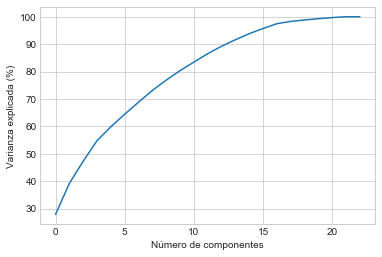

In [17]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(cum_var_exp,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()


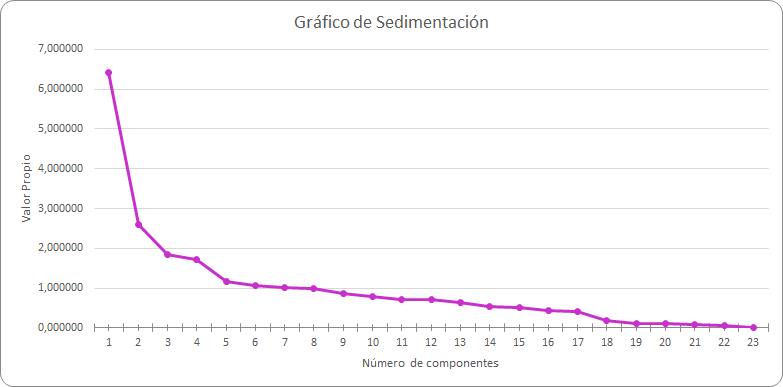

Teniendo en cuenta el gráfico anterior se toman las 9 primeras componentes que explican el 73.166% de la varianza

In [18]:
M_w=eigen_vector[:,0:9]
Y=X_std.dot(M_w) # Nuevos Y

5.PCA

In [19]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=9)
Y_1=sklearn_PCA.fit_transform(X_std)

En cuanto a las nueve componentes escogidas, la quinta hace referencia al monto de las provisiones hechas por la empresa para cubrir eventuales pérdidas de cartera e inventarios y la séptima comprende las inversiones en activos fijos depreciables o con vida útil limitada y al valor de las pólizas de seguros que los amparan. Por otra parte, la segunda, cuarta, sexta y novena componente presentan valores altos pero negativos en las variables correspondientes a las inversiones en activos fijos dedicados exclusivamente para la elaboración de los productos, al valor contable de los activos fijos no destinados a la venta, a las existencias de productos en proceso o terminados y a los inventarios de elementos que no han sufrido ningún proceso de transformación, respectivamente.

Las tres componentes restantes presentan valores altos tanto positivos como negativos, por ejemplo la primera y la tercera componente confrontan la producción bruta contra el valor contable actual de las edificaciones y las inversiones en activos fijos, y la octava componente contrapone el valor de compra de todos elementos físicamente incorporados a los productos con respecto al costo del inventario de éstos.


In [20]:
PCArecursos = pd.DataFrame(data = Y_1, columns = ['COMPONENTE_1_RT','COMPONENTE_2_RT','COMPONENTE_3_RT','COMPONENTE_4_RT','COMPONENTE_5_RT','COMPONENTE_6_RT','COMPONENTE_7_RT','COMPONENTE_8_RT','COMPONENTE_9_RT'])
PCArecursos.head(823)

,COMPONENTE_1_RT,COMPONENTE_2_RT,COMPONENTE_3_RT,COMPONENTE_4_RT,COMPONENTE_5_RT,COMPONENTE_6_RT,COMPONENTE_7_RT,COMPONENTE_8_RT,COMPONENTE_9_RT
0,-0.548456,-1.175219,1.243671,0.483830,0.178394,0.615532,0.375080,0.604906,-0.315585
1,0.031211,0.224897,1.655431,0.292874,0.219358,0.505554,-0.450831,-0.009104,-0.127336
2,-0.509823,-1.060858,1.369801,0.487407,0.125569,0.771088,-0.224428,-0.147624,-0.411581
3,-1.639575,-0.575343,0.805543,0.579792,-0.325906,0.523809,-0.192033,-0.776798,-0.260319
...,...,...,...,...,...,...,...,...,...
819,-0.993636,-0.049522,0.819033,0.350969,-0.026033,0.358088,1.020760,0.273570,-0.078705
820,-0.494679,0.715400,0.905219,-0.627112,0.065542,0.326723,0.324850,0.455092,0.071240
821,3.106647,-0.272268,-1.796592,-1.694880,-1.819961,0.617556,0.419109,0.496630,-3.745393
822,-1.134811,0.739878,1.062952,-0.576023,0.180772,-0.327526,-0.359344,-0.451493,-0.088449


In [21]:
ventas=total[['VENTAS']].head(823)
ventas

,VENTAS
10471,223374
10474,289190
10475,657023
10476,516359
...,...
11635,1100444
11636,3300208
11637,15443532
11638,1180126


In [22]:
PCArecursos.reset_index(drop=True, inplace=True) 
ventas.reset_index(drop=True, inplace=True) 
PCA_R = pd.concat([ventas,PCArecursos], axis=1)
PCA_R

,VENTAS,COMPONENTE_1_RT,COMPONENTE_2_RT,COMPONENTE_3_RT,COMPONENTE_4_RT,COMPONENTE_5_RT,COMPONENTE_6_RT,COMPONENTE_7_RT,COMPONENTE_8_RT,COMPONENTE_9_RT
0,223374,-0.548456,-1.175219,1.243671,0.483830,0.178394,0.615532,0.375080,0.604906,-0.315585
1,289190,0.031211,0.224897,1.655431,0.292874,0.219358,0.505554,-0.450831,-0.009104,-0.127336
2,657023,-0.509823,-1.060858,1.369801,0.487407,0.125569,0.771088,-0.224428,-0.147624,-0.411581
3,516359,-1.639575,-0.575343,0.805543,0.579792,-0.325906,0.523809,-0.192033,-0.776798,-0.260319
...,...,...,...,...,...,...,...,...,...,...
819,1100444,-0.993636,-0.049522,0.819033,0.350969,-0.026033,0.358088,1.020760,0.273570,-0.078705
820,3300208,-0.494679,0.715400,0.905219,-0.627112,0.065542,0.326723,0.324850,0.455092,0.071240
821,15443532,3.106647,-0.272268,-1.796592,-1.694880,-1.819961,0.617556,0.419109,0.496630,-3.745393
822,1180126,-1.134811,0.739878,1.062952,-0.576023,0.180772,-0.327526,-0.359344,-0.451493,-0.088449


In [23]:
print(sklearn_PCA.explained_variance_ratio_) 

[0.27890151 0.11337292 0.08063202 0.07513088 0.05057164 0.04592606
 0.04390842 0.0427579  0.03778843]


In [24]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo

PCA_R.to_excel("PCA_RecursosTangibles.xlsx")